# Marketing Campaign Causal Analysis

In [24]:
!pwd

/Users/donginkim/git/marketing-campaign-causal-analysis


In [25]:
import sys
import os

# 프로젝트 루트 디렉토리 설정
project_root = "/Users/donginkim/git/marketing-campaign-causal-analysis"
sys.path.append(project_root)

# 작업 디렉토리를 프로젝트 루트로 변경
os.chdir(project_root)

In [26]:
from src import statistical_tests, causal_inference
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [27]:
df = pd.read_csv("./data/marketing_ab.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [28]:
df.describe()

,user id,total ads,most ads hour
count,5.881010e+05,588101.000000,588101.000000
mean,1.310692e+06,24.820876,14.469061
std,2.022260e+05,43.715181,4.834634
min,9.000000e+05,1.000000,0.000000
25%,1.143190e+06,4.000000,11.000000
50%,1.313725e+06,13.000000,14.000000
75%,1.484088e+06,27.000000,18.000000
max,1.654483e+06,2065.000000,23.000000


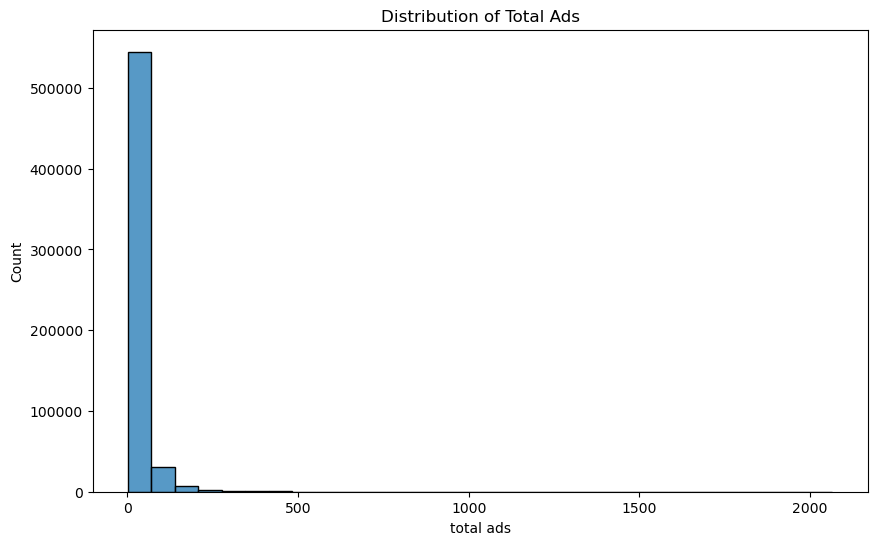

<Figure size 640x480 with 0 Axes>

In [5]:
# Histogram for 'total ads'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="total ads", bins=30)
plt.title("Distribution of Total Ads")
plt.show()

plt.savefig("results/histogram_total_ads.png")

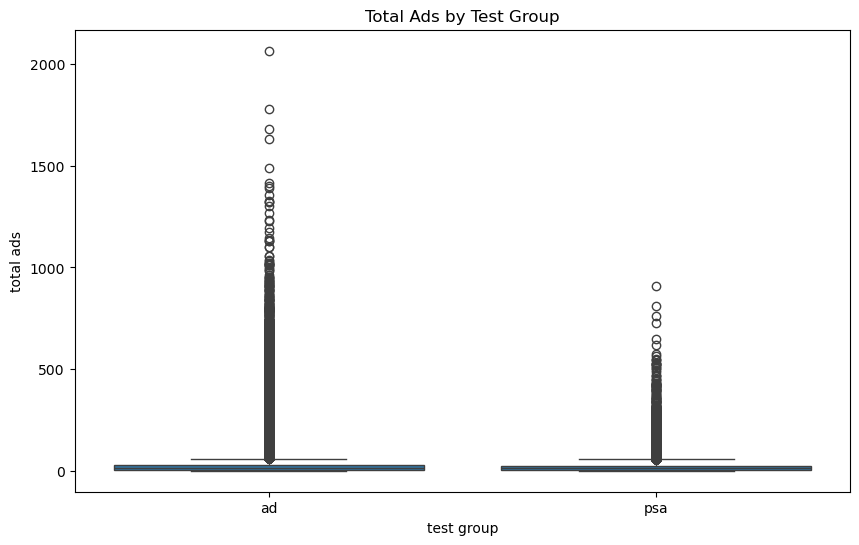

<Figure size 640x480 with 0 Axes>

In [6]:
# Box plot for 'total ads' by 'test group'
plt.figure(figsize=(10, 6))
sns.boxplot(x="test group", y="total ads", data=df)
plt.title("Total Ads by Test Group")
plt.show()

plt.savefig("results/boxplot_total_ads.png")

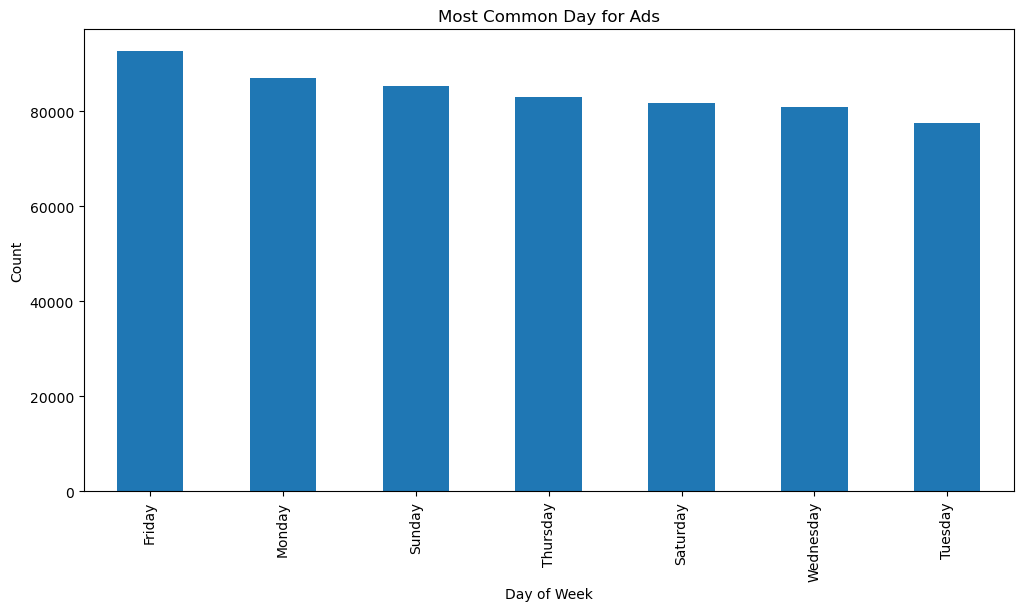

<Figure size 640x480 with 0 Axes>

In [7]:
# Bar plot for 'most ads day'
plt.figure(figsize=(12, 6))
df["most ads day"].value_counts().plot(kind="bar")
plt.title("Most Common Day for Ads")
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.show()

plt.savefig("results/barplot_most_ads_day.png")

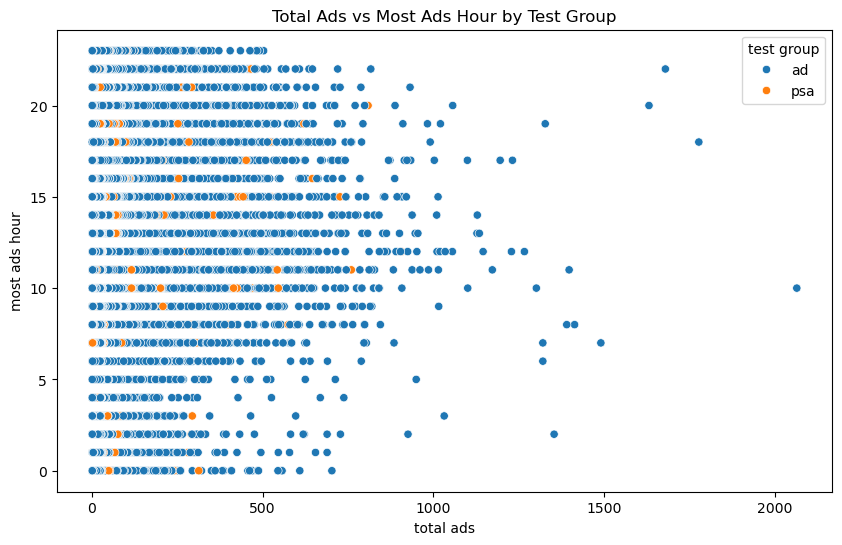

<Figure size 640x480 with 0 Axes>

In [8]:
# Scatter plot for 'total ads' vs 'most ads hour'
plt.figure(figsize=(10, 6))
sns.scatterplot(x="total ads", y="most ads hour", hue="test group", data=df)
plt.title("Total Ads vs Most Ads Hour by Test Group")
plt.show()

plt.savefig("results/scatterplot_ads_hour.png")

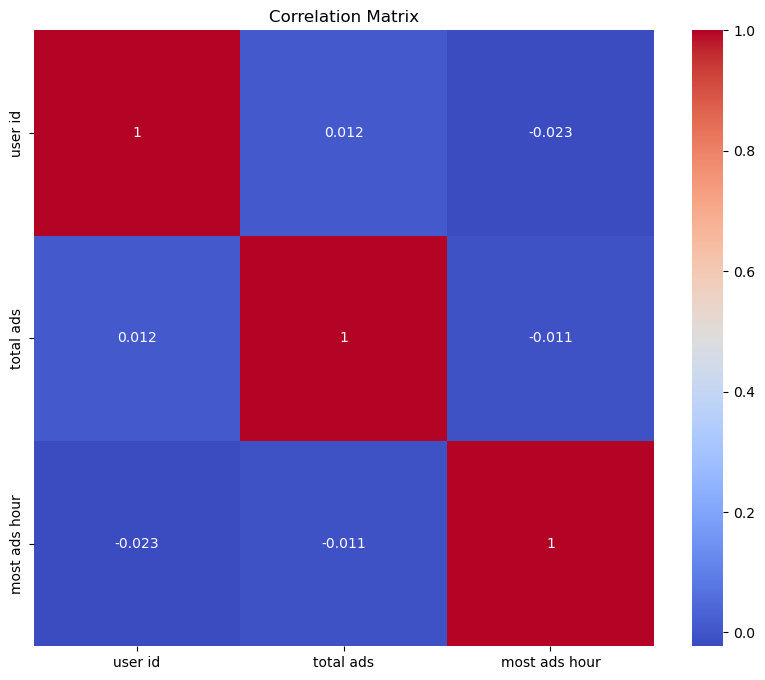

                user id  total ads  most ads hour
user id        1.000000   0.012336      -0.023002
total ads      0.012336   1.000000      -0.010837
most ads hour -0.023002  -0.010837       1.000000


<Figure size 640x480 with 0 Axes>

In [9]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
print(corr_matrix)

plt.savefig("results/correlation_matrix.png")

In [12]:
# T-test for 'total ads' between test groups
t_stat, p_value = statistical_tests.t_test(df, "test group", "total ads")
print(
    f"T-test results (total ads between test groups): t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}"
)

T-test results (total ads between test groups): t-statistic = 0.2139, p-value = 0.8306


In [13]:
# Chi-square test between 'test group' and 'converted'
chi2, p_value = statistical_tests.chi_square_test(df, "test group", "converted")
print(
    f"Chi-square test results (test group vs converted): chi2 = {chi2:.4f}, p-value = {p_value:.4f}"
)

Chi-square test results (test group vs converted): chi2 = 54.0058, p-value = 0.0000


In [14]:
# ANOVA test for 'total ads' across 'most ads day'
f_value, p_value = statistical_tests.anova_test(df, "most ads day", "total ads")
print(
    f"ANOVA test results (total ads across most ads day): F-value = {f_value:.4f}, p-value = {p_value:.4f}"
)

ANOVA test results (total ads across most ads day): F-value = 50.3731, p-value = 0.0000


In [15]:
# Correlation test between 'total ads' and 'most ads hour'
r, p_value = statistical_tests.correlation_test(df, "total ads", "most ads hour")
print(
    f"Correlation test results (total ads vs most ads hour): r = {r:.4f}, p-value = {p_value:.4f}"
)

Correlation test results (total ads vs most ads hour): r = -0.0108, p-value = 0.0000


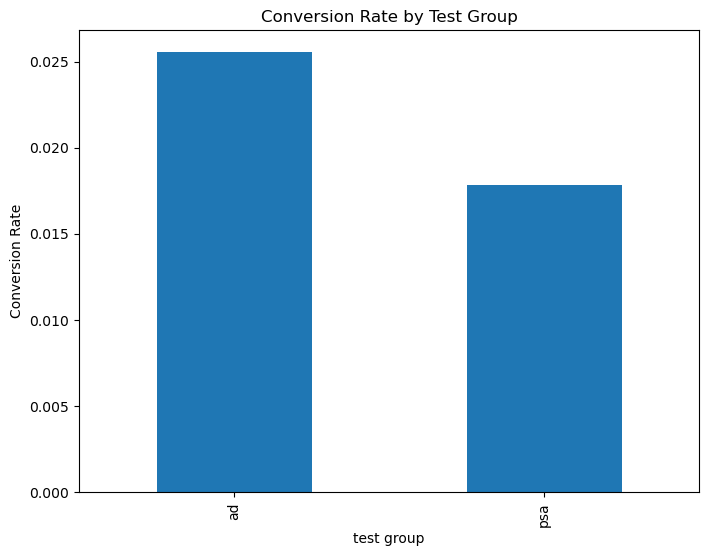

In [16]:
# 추가적인 시각화: 'converted' 비율 by 'test group'
plt.figure(figsize=(8, 6))
df.groupby("test group")["converted"].mean().plot(kind="bar")
plt.title("Conversion Rate by Test Group")
plt.ylabel("Conversion Rate")
plt.savefig(os.path.join(project_root, "results", "conversion_rate_by_test_group.png"))
plt.show()

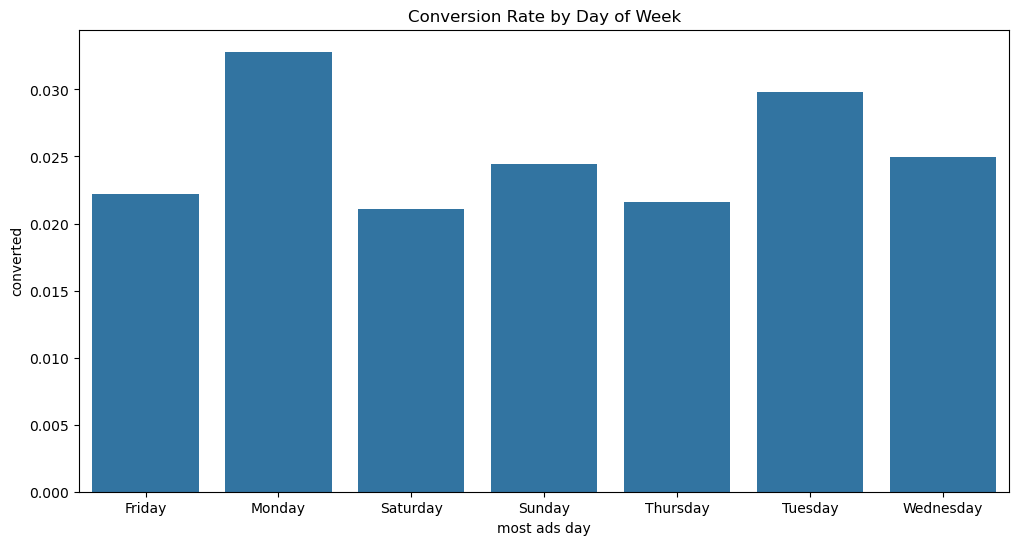

In [17]:
# 1. 요일별 광고 노출과 전환율 분석
daily_stats = (
    df.groupby("most ads day")
    .agg({"total ads": "mean", "converted": "mean"})
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(x="most ads day", y="converted", data=daily_stats)
plt.title("Conversion Rate by Day of Week")
plt.savefig("results/conversion_rate_by_day.png")
plt.show()
plt.close()

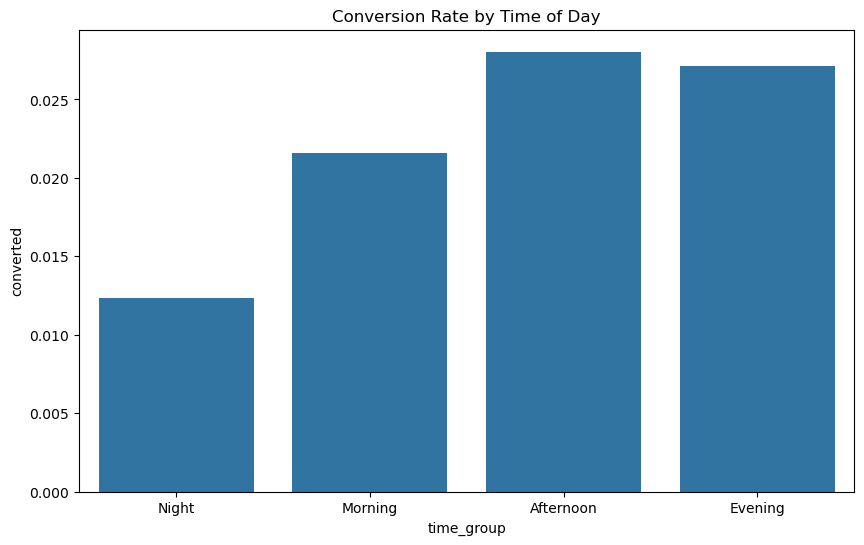

In [18]:
# 2. 시간대별 광고 효과 분석
df["time_group"] = pd.cut(
    df["most ads hour"],
    bins=[0, 6, 12, 18, 24],
    labels=["Night", "Morning", "Afternoon", "Evening"],
)
time_stats = df.groupby("time_group").agg({"converted": "mean"}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x="time_group", y="converted", data=time_stats)
plt.title("Conversion Rate by Time of Day")
plt.savefig("results/conversion_rate_by_time.png")
plt.show()
plt.close()

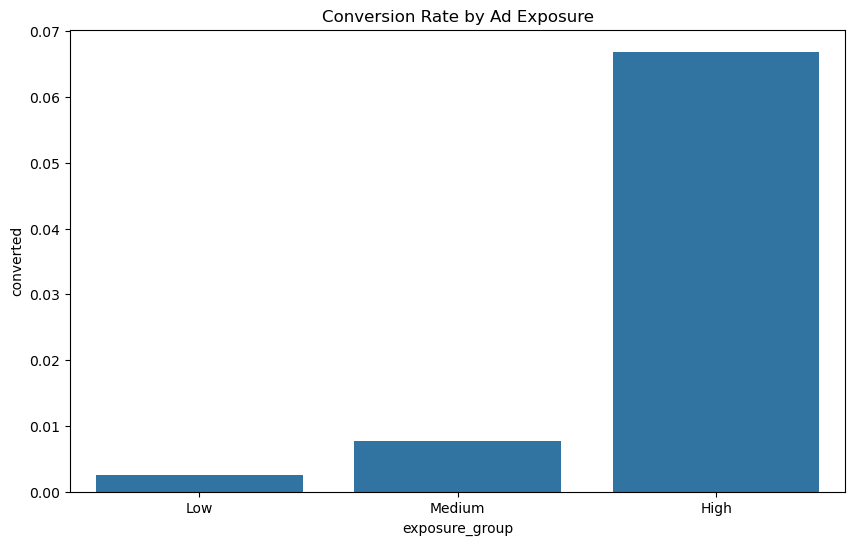

In [19]:
# 3. 광고 노출 빈도에 따른 전환율 분석
df["exposure_group"] = pd.qcut(df["total ads"], q=3, labels=["Low", "Medium", "High"])
exposure_stats = df.groupby("exposure_group").agg({"converted": "mean"}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x="exposure_group", y="converted", data=exposure_stats)
plt.title("Conversion Rate by Ad Exposure")
plt.savefig("results/conversion_rate_by_exposure.png")
plt.show()
plt.close()

In [22]:
# 4. 통계적 검정
f_value, p_value = stats.f_oneway(
    *[group["converted"].values for name, group in df.groupby("most ads day")]
)
print(
    f"ANOVA test for conversion rate across days: F-value = {f_value:.4f}, p-value = {p_value:.4f}"
)

ANOVA test for conversion rate across days: F-value = 68.3882, p-value = 0.0000


In [23]:
# 5. 상관관계 분석
correlation = df["total ads"].corr(df["converted"])
print(f"Correlation between total ads and conversion: {correlation:.4f}")

Correlation between total ads and conversion: 0.2174


# Causal Inference

In [34]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour,propensity_score
0,1069124,ad,False,130,Monday,20,0.038301
1,1119715,ad,False,93,Tuesday,22,0.037824
2,1144181,ad,False,21,Tuesday,18,0.039009
3,1435133,ad,False,355,Tuesday,10,0.040709
4,1015700,ad,False,276,Friday,14,0.039712


In [35]:
print(df.isnull().sum())

user id             0
test group          0
converted           0
total ads           0
most ads day        0
most ads hour       0
propensity_score    0
dtype: int64


In [46]:
from sklearn.preprocessing import StandardScaler

# Propensity Score Matching
covariates = ["total ads", "most ads hour"]
treatment_col = "test group"
outcome_col = "converted"

X = df[covariates]
y = df[treatment_col]

# Standardize covariates
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import pairwise_distances

# Estimate propensity scores
pscore_model = LogisticRegression(random_state=42)
pscore_model.fit(X_scaled, y)
df["propensity_score"] = pscore_model.predict_proba(X_scaled)[:, 1]

# Matching
treated = df[df[treatment_col] == "ad"]
control = df[df[treatment_col] == "psa"]


def match(treated_unit):
    distances = pairwise_distances(
        treated_unit[covariates + ["propensity_score"]].values.reshape(1, -1),
        control[covariates + ["propensity_score"]].values,
    )
    return control.iloc[distances.argmin()]


matched = treated.apply(match, axis=1)

In [47]:
matched

,user id,test group,converted,total ads,most ads day,most ads hour,propensity_score
0,904345,psa,False,130,Friday,21,0.038033
1,923236,psa,False,93,Wednesday,23,0.037560
2,905735,psa,False,21,Sunday,18,0.039009
3,919326,psa,False,356,Tuesday,14,0.039586
4,910132,psa,True,275,Wednesday,15,0.039436
...,...,...,...,...,...,...,...
588096,902404,psa,False,1,Thursday,23,0.037697
588097,902404,psa,False,1,Thursday,23,0.037697
588098,918355,psa,False,3,Thursday,23,0.037694
588099,902404,psa,False,1,Thursday,23,0.037697


In [48]:
# calculate ate
ate = treated[outcome_col].mean() - matched[outcome_col].mean()
ate

0.007088492800804851

In [49]:
df

,user id,test group,converted,total ads,most ads day,most ads hour,propensity_score
0,1069124,ad,False,130,Monday,20,0.038301
1,1119715,ad,False,93,Tuesday,22,0.037824
2,1144181,ad,False,21,Tuesday,18,0.039009
3,1435133,ad,False,355,Tuesday,10,0.040709
4,1015700,ad,False,276,Friday,14,0.039712
...,...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23,0.037697
588097,1327975,ad,False,1,Tuesday,23,0.037697
588098,1038442,ad,False,3,Tuesday,23,0.037694
588099,1496395,ad,False,1,Tuesday,23,0.037697


In [50]:
df["time"] = np.random.choice(["pre", "post"], size=len(df))

# 'converted' 열을 float 타입으로 변환 (만약 이미 숫자 타입이 아니라면)
df["converted"] = df["converted"].astype(float)

# 그룹별 평균 계산
group_means = df.groupby(["time", "test group"])["converted"].mean().unstack()

# DiD 추정치 계산
treated_diff = group_means.loc["post", "ad"] - group_means.loc["pre", "ad"]
control_diff = group_means.loc["post", "psa"] - group_means.loc["pre", "psa"]
did_estimate = treated_diff - control_diff

print("Group Means:")
print(group_means)
print(f"\nDifference-in-Differences Estimate: {did_estimate:.4f}")

Group Means:
test group        ad       psa
time                          
post        0.025291  0.017759
pre         0.025803  0.017950

Difference-in-Differences Estimate: -0.0003


<Figure size 1000x600 with 0 Axes>

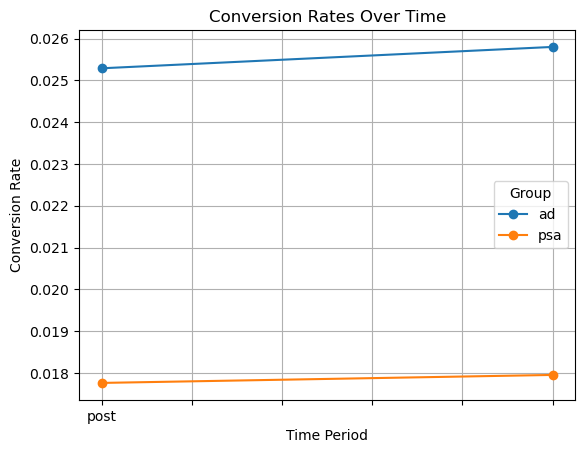

In [53]:
# 시각화
plt.figure(figsize=(10, 6))
group_means.plot(marker="o")
plt.title("Conversion Rates Over Time")
plt.xlabel("Time Period")
plt.ylabel("Conversion Rate")
plt.legend(title="Group")
plt.grid(True)
# plt.savefig("../results/did_visualization.png")
plt.show()

In [54]:
# 결과 해석
print("\nInterpretation:")
if did_estimate > 0:
    print(
        f"The ad campaign increased conversion rates by approximately {did_estimate*100:.2f} percentage points."
    )
elif did_estimate < 0:
    print(
        f"The ad campaign decreased conversion rates by approximately {abs(did_estimate)*100:.2f} percentage points."
    )
else:
    print("The ad campaign had no significant effect on conversion rates.")

print(
    "\nNote: This result is based on simulated time data and should be interpreted cautiously."
)


Interpretation:
The ad campaign decreased conversion rates by approximately 0.03 percentage points.

Note: This result is based on simulated time data and should be interpreted cautiously.


In [57]:
# 추가적인 통계 분석 (t-test)
from scipy import stats

pre_treatment = df[(df["time"] == "pre") & (df["test group"] == "ad")]["converted"]
post_treatment = df[(df["time"] == "post") & (df["test group"] == "ad")]["converted"]
pre_control = df[(df["time"] == "pre") & (df["test group"] == "psa")]["converted"]
post_control = df[(df["time"] == "post") & (df["test group"] == "psa")]["converted"]
t_stat, p_value = stats.ttest_ind(
    (post_treatment - pre_treatment), (post_control - pre_control)
)

In [58]:
print(f"\nt-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("The difference is statistically significant at the 5% level.")
else:
    print("The difference is not statistically significant at the 5% level.")


t-statistic: nan
p-value: nan
The difference is not statistically significant at the 5% level.
